<h2><b>Project 1:</b> Exploring Tokenization and Embeddings</h2><h3>By Ajay Sethuraman</h3>

**Objective:** Understand how text is broken down and represented numerically by LLMs.

**Tasks:**

* Choose a short paragraph (100–150 words) from any book, article, or web
page.
* Tokenize the text using any tool (e.g., Python’s transformers library or an online tokenizer).
* Analyze the tokens:
    * How many tokens does your text have?
    * Do any words split into subwords? If so, which ones?
* Visualize embeddings:
    * Use a pre-trained model (e.g., GPT or BERT) to extract embeddings for a few tokens.
    * Plot the embeddings in a 2D or 3D space using a tool like t-SNE or PCA.

In [41]:
import torch
from transformers import AutoTokenizer, AutoModel
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [42]:
# Step 1: Choose a Paragraph
paragraph = """The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem. However, real progress was much slower, and after the ALPAC report in 1966, which found that ten years of research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. Little further research in machine translation was conducted in America (though some research continued elsewhere, such as Japan and Europe) until the late 1980s when the first statistical machine translation systems were developed."""

In [43]:
# Step 2: Load Pre-trained Tokenizer and Model
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

In [44]:
# Step 3: Tokenization
encoded = tokenizer(paragraph, return_tensors="pt", truncation=True)  # Convert text to token IDs
tokens = tokenizer.convert_ids_to_tokens(encoded["input_ids"][0])  # Convert token IDs to readable tokens

In [45]:
# Step 4: Token Analysis
num_tokens = len(tokens)  # Count total tokens
tokenized_subwords = [token for token in tokens if "##" in token]  # Identify subword tokens

In [46]:
# Step 5: Extract Embeddings
with torch.no_grad():  # Disable gradient computation for efficiency
    outputs = model(**encoded)  # Get model outputs
embeddings = outputs.last_hidden_state.squeeze(0).numpy()  # Extract token embeddings

In [47]:
# Step 6: Reduce Dimensionality with PCA for Visualization
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

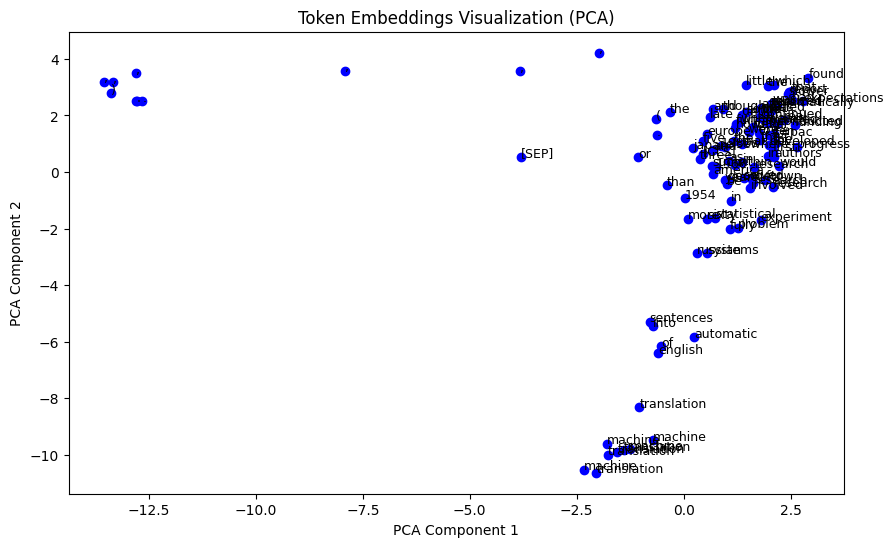

In [48]:
# Step 7: Plot Token Embeddings in 2D Space
plt.figure(figsize=(10, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], color='blue')
for i, token in enumerate(tokens):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], token, fontsize=9)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Token Embeddings Visualization (PCA)")
plt.show()

In [49]:
# Step 8: Print Results Summary
print(f"Total Tokens: {num_tokens}")
print(f"Subword Tokens: {tokenized_subwords}")

Total Tokens: 114
Subword Tokens: ['##pac']


We tokenized a paragraph on machine translation history using BERT’s tokenizer. The total number of tokens was 114, with “##pac” being the only subword token. Using BERT’s pre-trained model, we extracted token embeddings and visualized them in 2D space using PCA. The plot shows clusters of semantically related words, illustrating how the model captures contextual relationships.

This analysis highlights how transformer-based models tokenize text and encode linguistic structures in high-dimensional space.